In [1]:
import numpy as np
import wave
from pylab import *

In [20]:
def getData(filename):
    wf = wave.open(filename, "rb")
    data = wf.readframes(wf.getnframes())
    data = frombuffer(data, dtype="int16")
    length = float(wf.getnframes()) / wf.getframerate()  # 波形長さ（秒）

    return data, length

In [17]:
def drawData(data, length):
    # FFTのサンプル数
    N = 512
    
    # FFTで用いるハミング窓
    hammingWindow = np.hamming(N)
    # Framerate は44100固定
    F = 44100
    # スペクトログラムを描画
    pxx, freqs, bins, im = specgram(data, NFFT=N, Fs=F, noverlap=0, window=hammingWindow)
    axis([0, length, 0, F / 2])
    xlabel("time [second]")
    ylabel("frequency [Hz]")

    show()

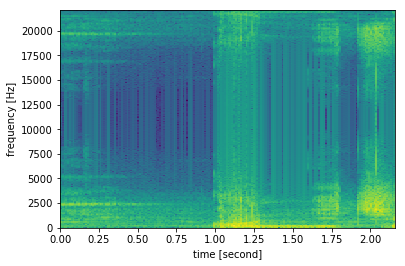

In [21]:
# 1-5.wav:こんにちは 
# 6-7.wav:こんばんは

# drawing 'こんにちは'
data1, length1 = getData('sounddata/1.wav')
drawData(data1, length1)

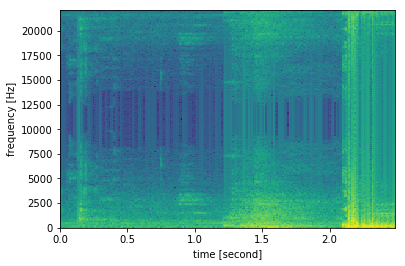

In [40]:
# drawing 'こんばんは
data6, length6 = getData('sounddata/6.wav')
drawData(data6, length6)

In [33]:
#音声データを読み込み、numpyアレイに変換
data1, length1 = getData('sounddata/1.wav')
data2, length2  = getData('sounddata/2.wav')
data3, length3  = getData('sounddata/3.wav')
data4, length4  = getData('sounddata/4.wav')
data5, length5  = getData('sounddata/5.wav')
data6, length6  = getData('sounddata/5.wav')
data7, length7  = getData('sounddata/5.wav')

print data1.shape
print data2.shape
print data3.shape
print data4.shape
print data5.shape

data1 = data1[:190336]
data2 = data2[:190336]
data3 = data3[:190336]
data4 = data4[:190336]
data5 = data5[:190336]
data6 = data5[:190336]
data7 = data5[:190336]

print data1.shape
print data2.shape
print data3.shape
print data4.shape
print data5.shape

(190336,)
(290688,)
(208768,)
(257920,)
(223104,)
(190336,)
(190336,)
(190336,)
(190336,)
(190336,)


In [38]:
#学習用データxと正解ラベルyを作成
# 0: こんにちは
# 1: こんばんは

x = np.array([data1,data2,data3,data4,data5,data6,data7])
y = np.array([0,0,0,0,0,1,1]

# NativeBayesで予測モデルを作成
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x,y)

# 予測モデルに学習用データを適用して結果を確認する。
predicted = model.predict(x)
predicted
for i, k in enumerate(predicted):
    print i+1, '回目の音声は', k, 'です。' 

1 回目の音声は 0 です。
2 回目の音声は 0 です。
3 回目の音声は 0 です。
4 回目の音声は 0 です。
5 回目の音声は 1 です。
6 回目の音声は 1 です。
7 回目の音声は 1 です。
